# AGE clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [2]:
df_train = pd.read_csv("../data/train_users_2.csv")

In [3]:
df_test = pd.read_csv("../data/test_users.csv")

In [4]:
df_all = pd.concat([df_train, df_test])

In [5]:
len(df_train) , len(df_test), len(df_all)

(213451, 62096, 275547)

In [6]:
n_missing = df_all["age"].isnull().sum()

In [7]:
print("age_percentage : ", n_missing / len(df_all) * 100, "missing_value : ", n_missing)

age_percentage :  42.4123652226 missing_value :  116866


In [8]:
df_all_under120 = df_all[df_all["age"] < 120]

In [9]:
df_all_under120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157851 entries, 1 to 62095
Data columns (total 16 columns):
affiliate_channel          157851 non-null object
affiliate_provider         157851 non-null object
age                        157851 non-null float64
country_destination        124680 non-null object
date_account_created       157851 non-null object
date_first_booking         68156 non-null object
first_affiliate_tracked    155841 non-null object
first_browser              157851 non-null object
first_device_type          157851 non-null object
gender                     157851 non-null object
id                         157851 non-null object
language                   157851 non-null object
signup_app                 157851 non-null object
signup_flow                157851 non-null int64
signup_method              157851 non-null object
timestamp_first_active     157851 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 20.5+ MB


In [10]:
li_cate = ["affiliate_channel", "affiliate_provider", "first_affiliate_tracked", "first_browser", "first_device_type",
          "gender", "language", "signup_app", "signup_method"]

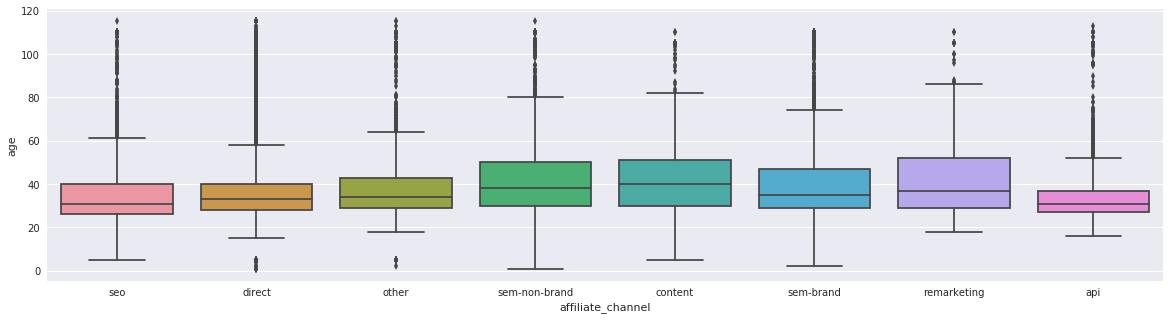

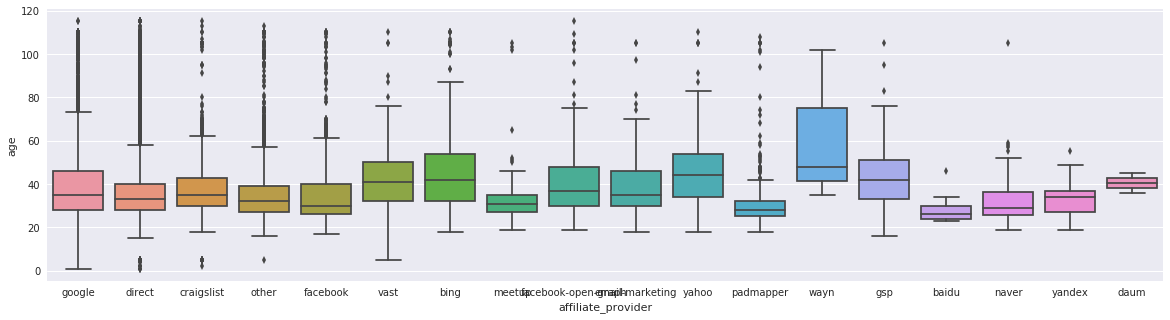

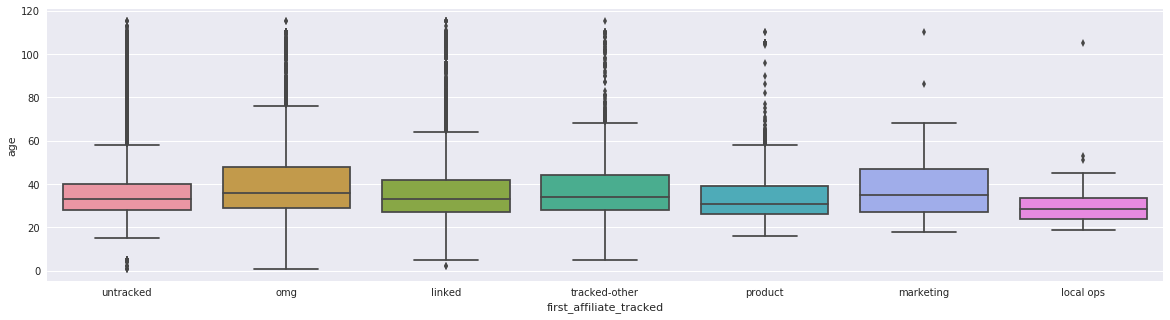

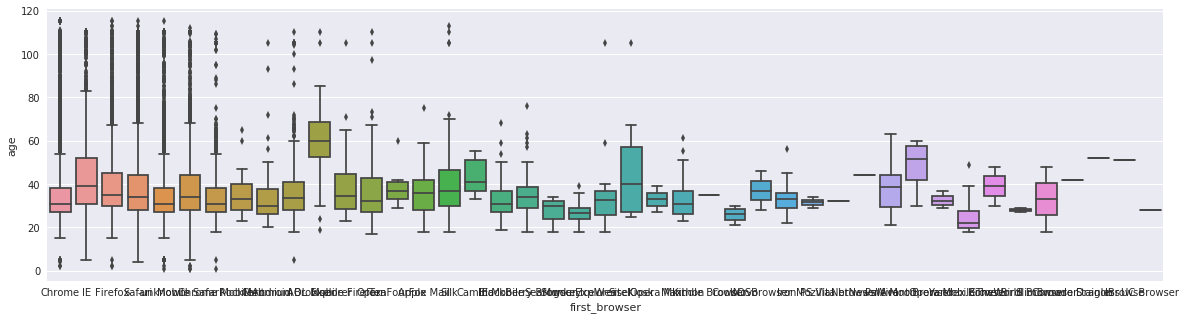

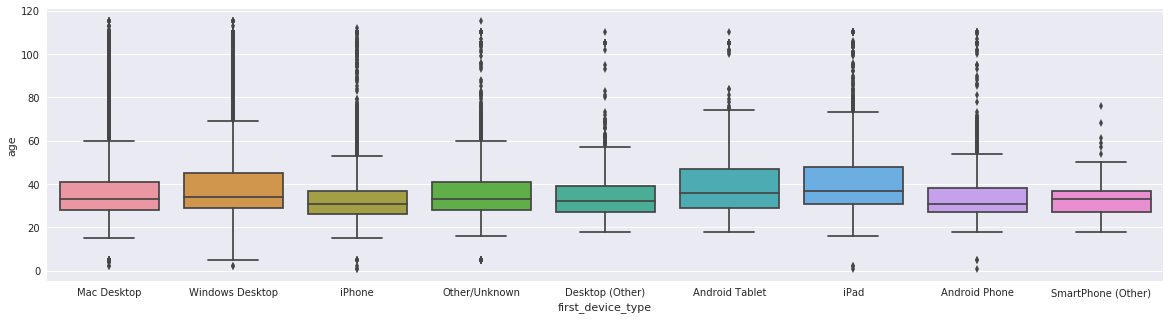

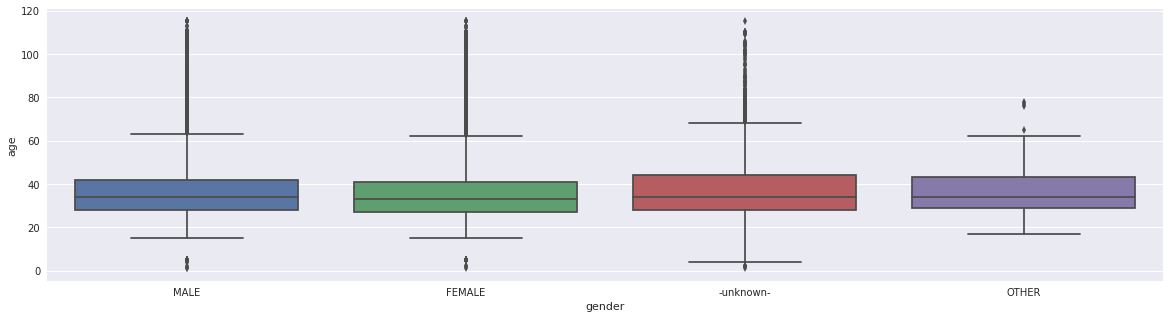

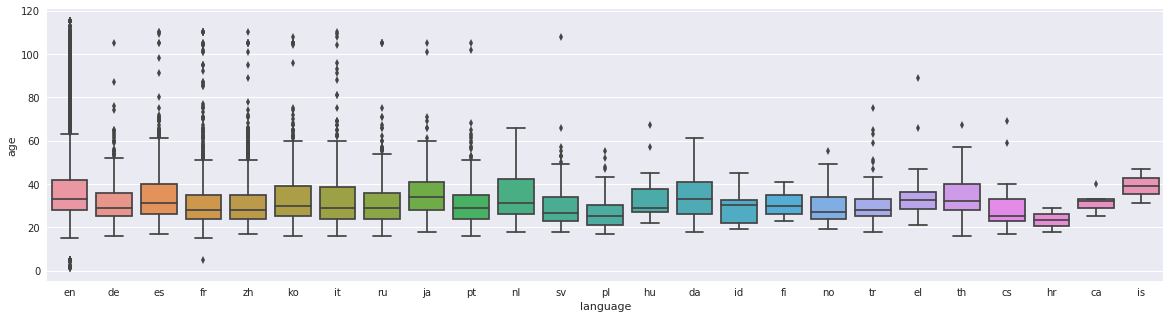

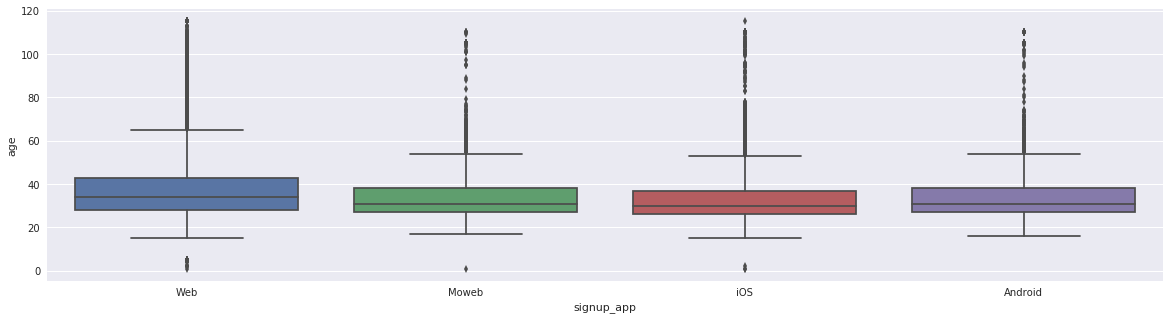

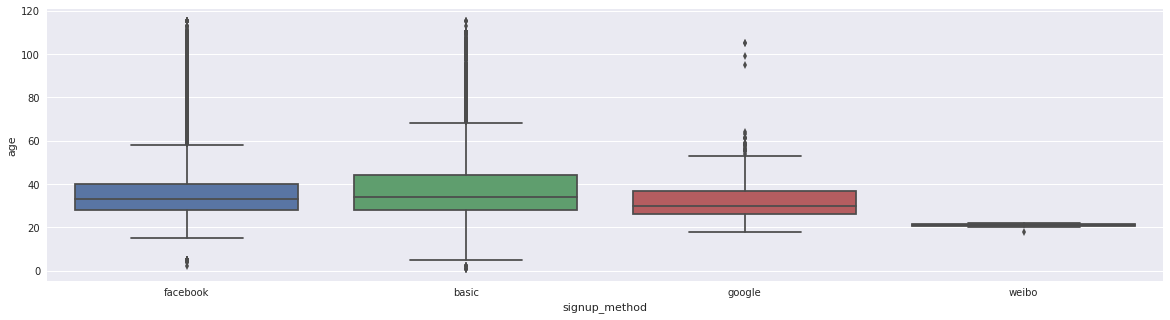

In [11]:
for element in li_cate:
    fig, ax = plt.subplots(figsize = (20, 5))
    sns.boxplot(x=element, y="age", data = df_all_under120, ax = ax)
    plt.show()

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
li_age_predict = ["affiliate_channel", "affiliate_provider", "first_affiliate_tracked", "first_browser", "first_device_type",
          "language", "signup_method", "age"]

In [14]:
X = pd.get_dummies(df_all_under120[li_age_predict]).iloc[:10000]

In [15]:
X.reset_index(drop = True, inplace = True)

In [16]:
dbscan = DBSCAN(n_jobs = 4, eps=2)

In [17]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=4, p=None)

문제 설정 : 어떻게 AGE missing value를 채울 것인가?
- Try 1. AGE와 관련 되어 있는 칼럼을 뽑아내어 특정 칼럼을 clustering해서 군집된 내용의 AGE로 넣는다.
  - 문제점 : AGE와 상관관계가 높은 데이터가 별로 없어 대부분이 전체 데이터의 median으로 측정될 것으로 예상된다.
  
- Try 2. 

In [18]:
X["label"] = pd.Series(dbscan.labels_)

In [19]:
s_label_median = X.groupby(by = ["label"])["age"].median()

In [20]:
s_label_median.describe()

count      8.000000
mean      75.625000
std       38.306797
min        5.000000
25%       61.250000
50%       85.000000
75%      106.250000
max      110.000000
Name: age, dtype: float64

In [21]:
X["label"].value_counts()

 0    9663
-1     205
 3      59
 1      44
 2      12
 4       7
 6       5
 5       5
Name: label, dtype: int64

In [22]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import widgets

In [23]:
X3 = PCA(3).fit_transform(X)

In [24]:
def plot_pca(azim):
    fig = plt.figure(figsize = (20, 20) )
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=X['label'], s=10, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

In [25]:
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

A Jupyter Widget

In [26]:
len(X[X["label"]==1])

44

In [27]:
X["label"].value_counts().index

Int64Index([0, -1, 3, 1, 2, 4, 6, 5], dtype='int64')

0


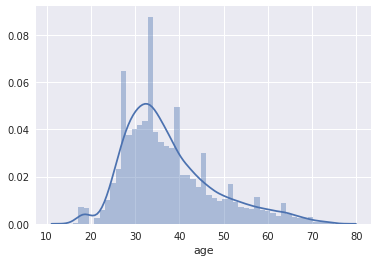

-1


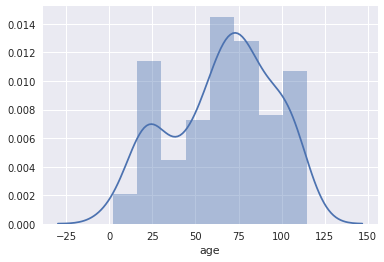

3


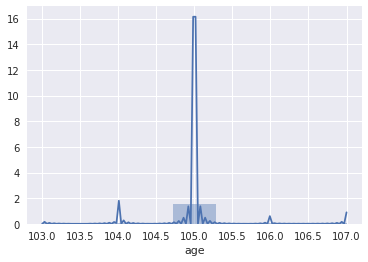

1


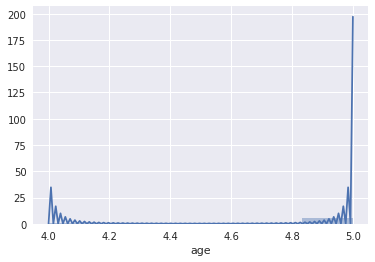

2


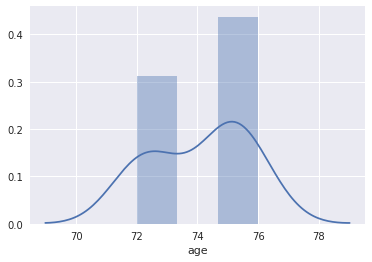

4


/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


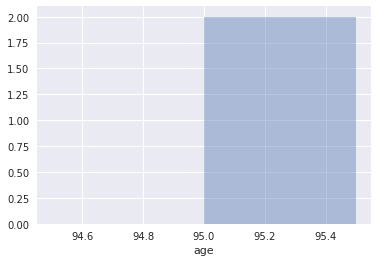

6


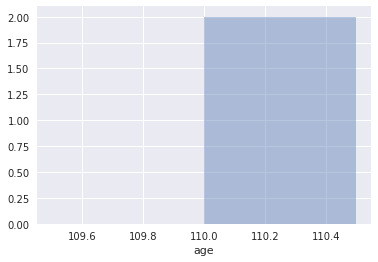

5


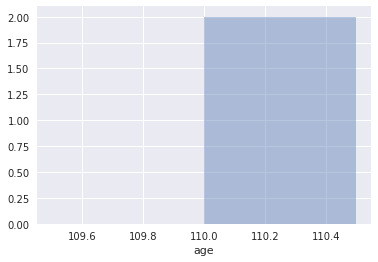

In [28]:
for i in X["label"].value_counts().index:
    print(i)
    sns.distplot(X[X["label"]==i]["age"])
    plt.show()